In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading data#
df = pd.read_csv('/Users/bhagyashrikadam/Documents/NEU_ASSIGNMENTS/ALY6020/Module4/week 4 - Nashville_housing_data.csv')

In [3]:
df.shape

(22651, 26)

In [4]:
print(df.dtypes)

Unnamed: 0                             int64
Parcel ID                             object
Land Use                              object
Property Address                      object
Suite/ Condo   #                     float64
Property City                         object
Sale Date                             object
Legal Reference                       object
Sold As Vacant                        object
Multiple Parcels Involved in Sale     object
City                                  object
State                                 object
Acreage                              float64
Tax District                          object
Neighborhood                           int64
Land Value                             int64
Building Value                         int64
Finished Area                        float64
Foundation Type                       object
Year Built                             int64
Exterior Wall                         object
Grade                                 object
Bedrooms  

In [5]:
df.head(5)

,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,...,Building Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value
0,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,1/11/2013,20130118-0006337,No,No,...,134400,1149.00000,PT BSMT,1941,BRICK,C,2.0,1.0,0.0,Over
1,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,1/18/2013,20130124-0008033,No,No,...,157800,2090.82495,SLAB,2000,BRICK/FRAME,C,3.0,2.0,1.0,Over
2,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,1/18/2013,20130128-0008863,No,No,...,243700,2145.60001,FULL BSMT,1948,BRICK/FRAME,B,4.0,2.0,0.0,Under
3,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,1/23/2013,20130131-0009929,No,No,...,138100,1969.00000,CRAWL,1910,FRAME,C,2.0,1.0,0.0,Under
4,5,119 05 0 387.00,SINGLE FAMILY,2626 FOSTER AVE,NaN,NASHVILLE,1/4/2013,20130118-0006110,No,No,...,86100,1037.00000,CRAWL,1945,FRAME,C,2.0,1.0,0.0,Under


In [6]:
## PART1 ##

## Data Cleaning ##

# Checking the number of missing values ##
missing_values = df.isnull().sum()
print(missing_values)

Unnamed: 0                               0
Parcel ID                                0
Land Use                                 0
Property Address                         2
Suite/ Condo   #                     22651
Property City                            2
Sale Date                                0
Legal Reference                          0
Sold As Vacant                           0
Multiple Parcels Involved in Sale        0
City                                     0
State                                    0
Acreage                                  0
Tax District                             0
Neighborhood                             0
Land Value                               0
Building Value                           0
Finished Area                            1
Foundation Type                          1
Year Built                               0
Exterior Wall                            0
Grade                                    0
Bedrooms                                 3
Full Bath  

In [7]:
# Drop the non-imp variables #

df = df.drop(['Suite/ Condo   #','Unnamed: 0'],axis = 1)


In [8]:
missing_values = df.isnull().sum()
print(missing_values)

Parcel ID                              0
Land Use                               0
Property Address                       2
Property City                          2
Sale Date                              0
Legal Reference                        0
Sold As Vacant                         0
Multiple Parcels Involved in Sale      0
City                                   0
State                                  0
Acreage                                0
Tax District                           0
Neighborhood                           0
Land Value                             0
Building Value                         0
Finished Area                          1
Foundation Type                        1
Year Built                             0
Exterior Wall                          0
Grade                                  0
Bedrooms                               3
Full Bath                              1
Half Bath                            108
Sale Price Compared To Value           0
dtype: int64


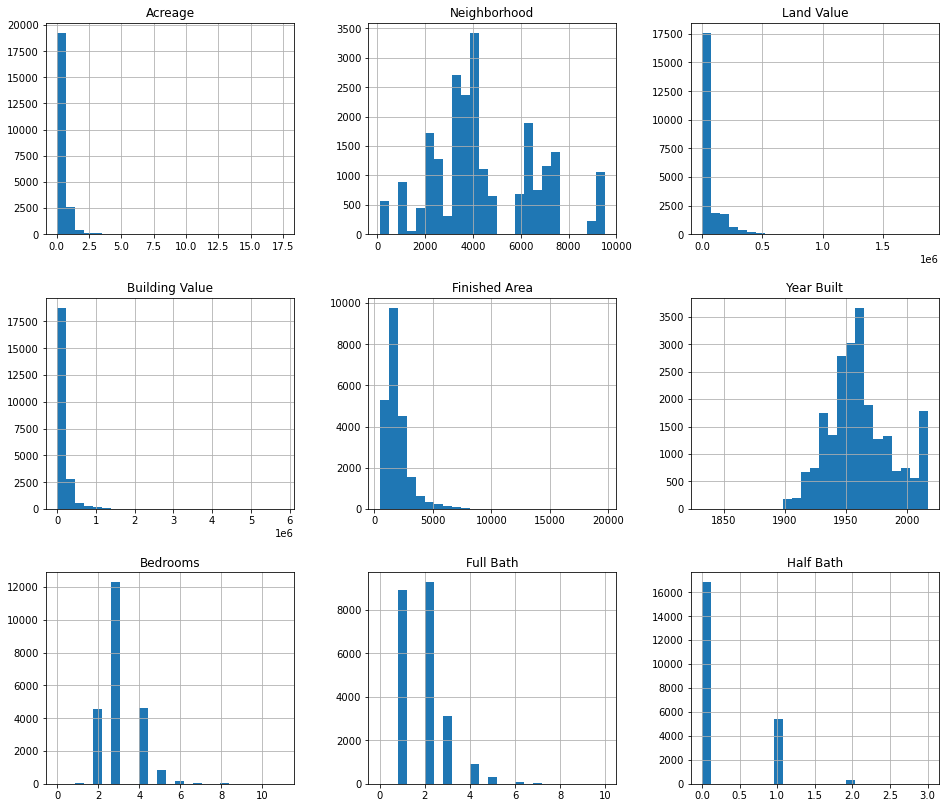

In [9]:
# Checking the distribution before imputation #

df.hist(figsize=(16,14),bins=25);


In [10]:
# Impute missing values #

# Numerical columns
numerical_cols = ['Finished Area', 'Bedrooms', 'Full Bath', 'Half Bath']
for col in numerical_cols:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

# Categorical columns
categorical_cols = ['Property Address', 'Property City', 'Foundation Type']
for col in categorical_cols:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

# Check if there are any missing values left
df.isnull().sum()

Parcel ID                            0
Land Use                             0
Property Address                     0
Property City                        0
Sale Date                            0
Legal Reference                      0
Sold As Vacant                       0
Multiple Parcels Involved in Sale    0
City                                 0
State                                0
Acreage                              0
Tax District                         0
Neighborhood                         0
Land Value                           0
Building Value                       0
Finished Area                        0
Foundation Type                      0
Year Built                           0
Exterior Wall                        0
Grade                                0
Bedrooms                             0
Full Bath                            0
Half Bath                            0
Sale Price Compared To Value         0
dtype: int64

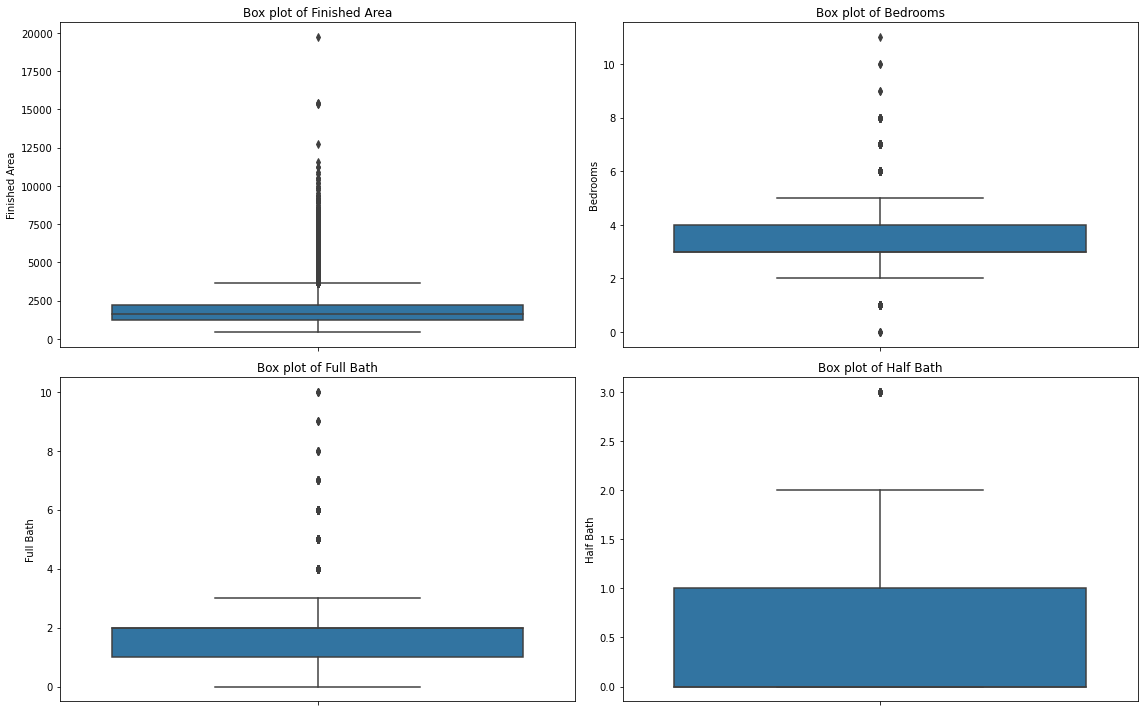

In [11]:
# Checking for outliers #
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots for numerical columns to visualize outliers
plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [24]:
# Checking for duplicate rows
duplicate_rows = df.duplicated().sum()
duplicate_rows

41

In [27]:
# Descriptive statistics for the Dataset #
numerical_data = df.select_dtypes(include=['int64', 'float64'])
numerical_data.describe()


,Acreage,Neighborhood,Land Value,Building Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath
count,22651.000000,22651.000000,2.265100e+04,2.265100e+04,22651.000000,22651.000000,22651.000000,22651.000000,22651.000000
mean,0.454705,4432.715024,7.013797e+04,1.722402e+05,1915.365251,1961.947684,3.104896,1.887290,0.268951
std,0.611818,2142.803595,1.029035e+05,1.896424e+05,1079.072186,25.843908,0.829233,0.951199,0.479401
min,0.040000,107.000000,9.000000e+02,1.400000e+03,450.000000,1832.000000,0.000000,0.000000,0.000000
25%,0.200000,3130.000000,2.200000e+04,8.550000e+04,1250.000000,1947.000000,3.000000,1.000000,0.000000
50%,0.280000,4026.000000,3.000000e+04,1.188000e+05,1645.824995,1959.000000,3.000000,2.000000,0.000000
75%,0.460000,6229.000000,6.030000e+04,1.882500e+05,2213.250000,1977.000000,4.000000,2.000000,1.000000
max,17.500000,9530.000000,1.869000e+06,5.824300e+06,19728.249880,2017.000000,11.000000,10.000000,3.000000


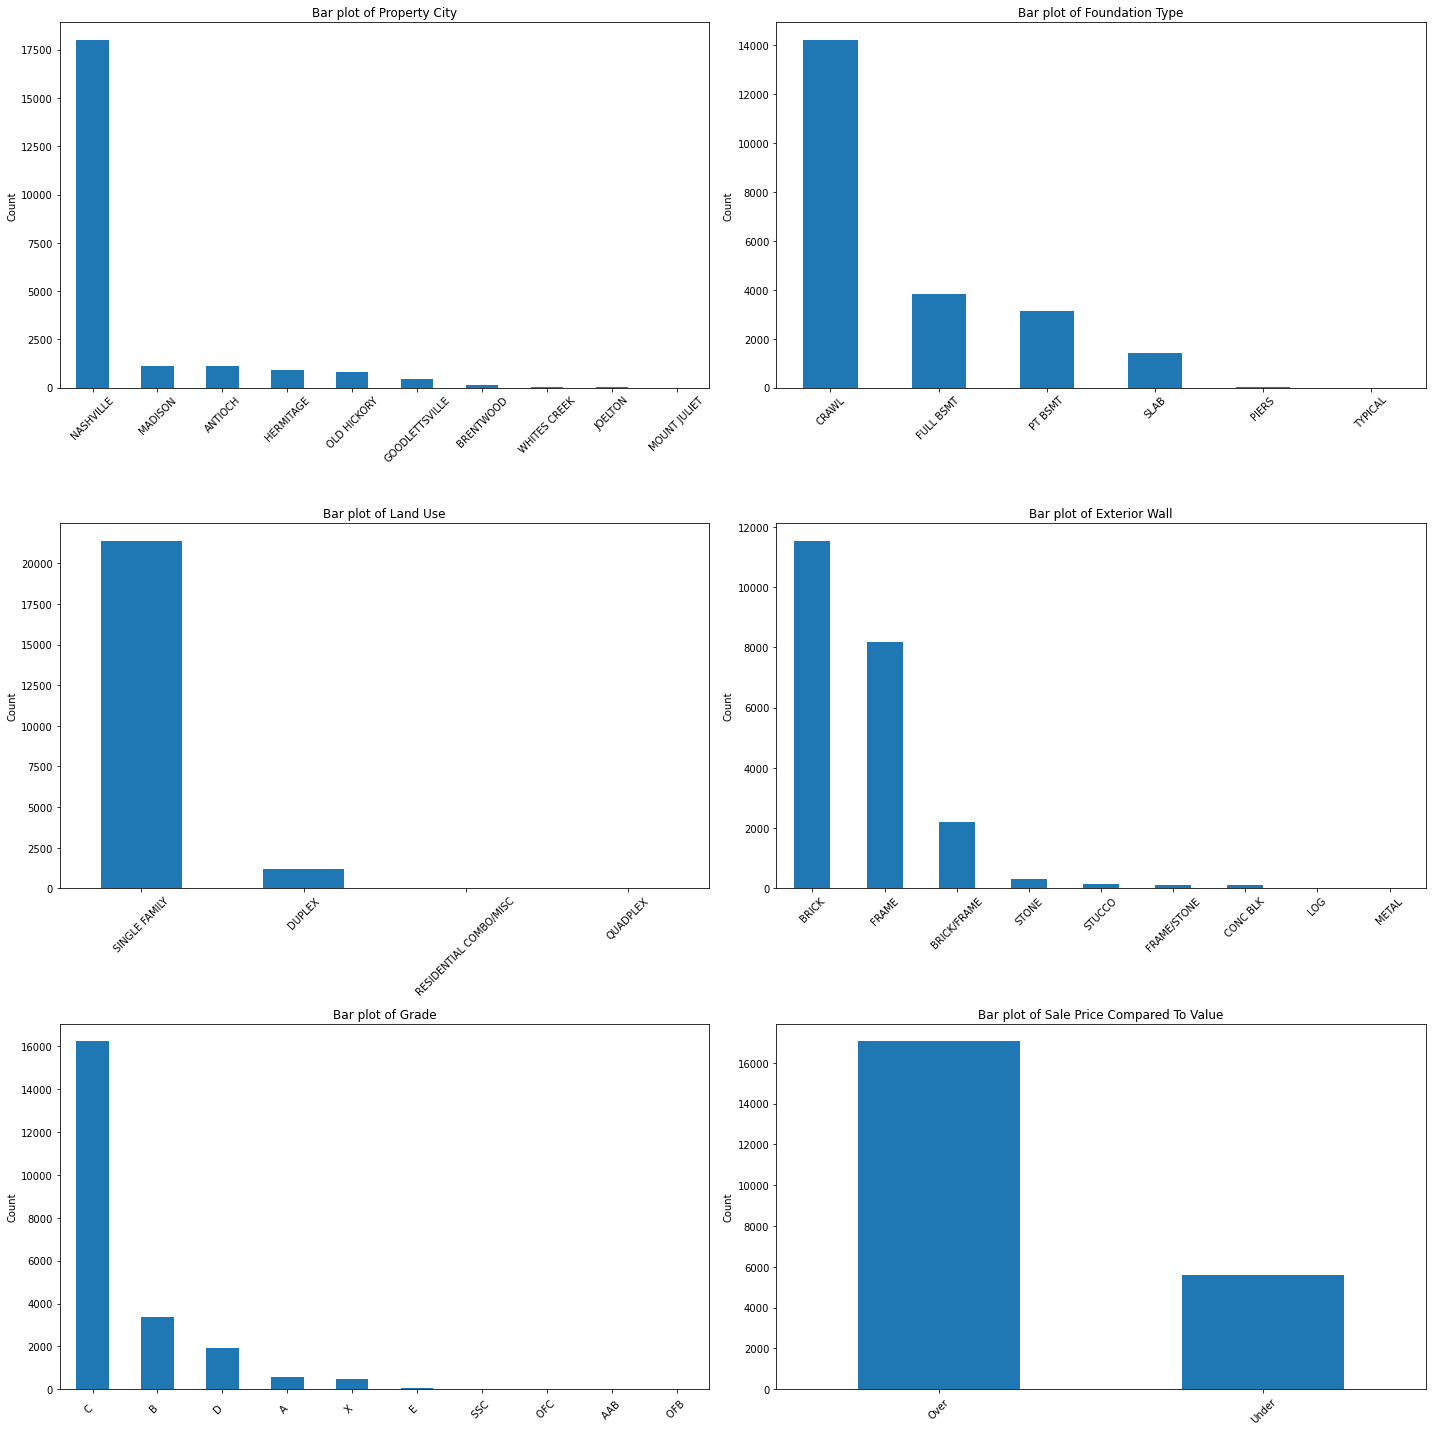

In [28]:
# Bar plots for categorical columns
categorical_cols = ['Property City', 'Foundation Type', 'Land Use', 'Exterior Wall', 'Grade' ,'Sale Price Compared To Value']

plt.figure(figsize=(20, 20))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Bar plot of {col}')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

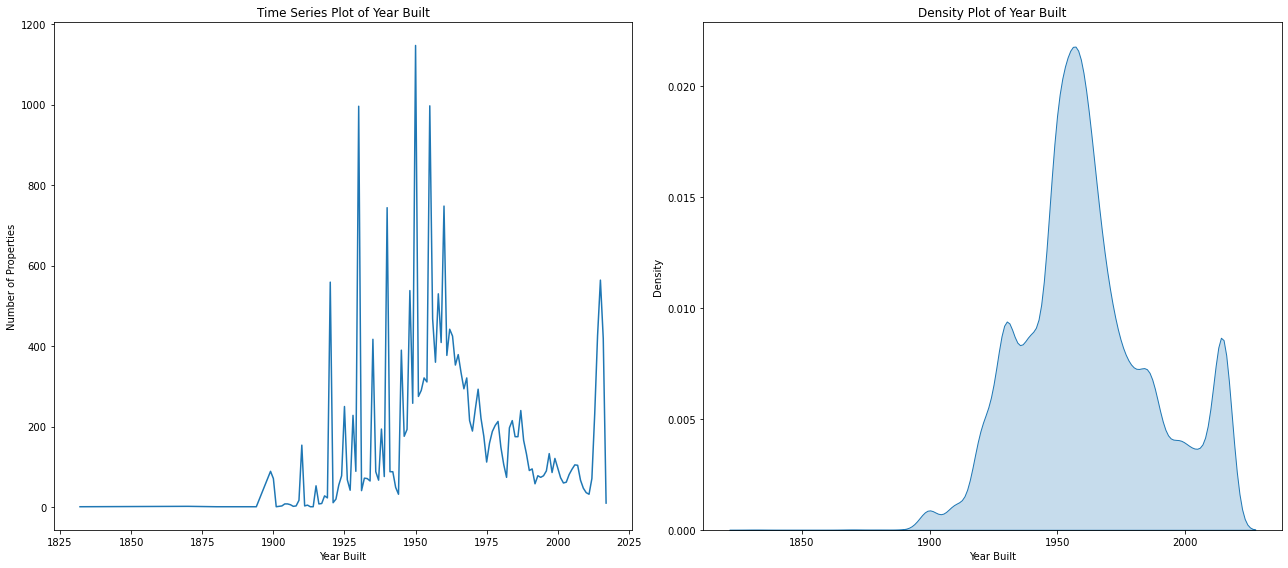

In [ ]:
# Time Series Plot and Density Plot for 'Year Built'

plt.figure(figsize=(18, 8))

# Time Series Plot
plt.subplot(1, 2, 1)
df['Year Built'].value_counts().sort_index().plot()
plt.title('Time Series Plot of Year Built')
plt.xlabel('Year Built')
plt.ylabel('Number of Properties')

# Density Plot
plt.subplot(1, 2, 2)
sns.kdeplot(df['Year Built'], shade=True)
plt.title('Density Plot of Year Built')
plt.xlabel('Year Built')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

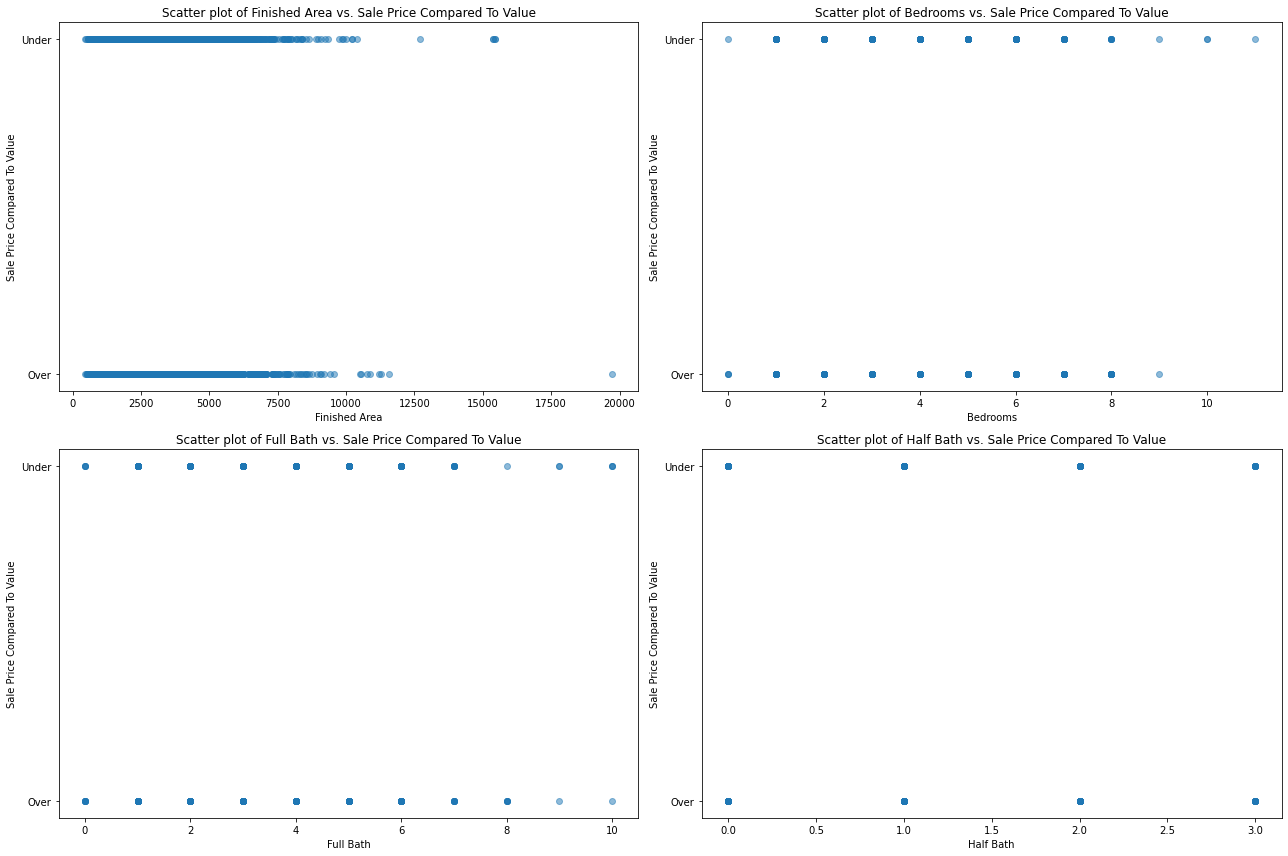

In [15]:
# Scatter Plots for numerical columns against 'Sale Price Compared To Value'
target = 'Sale Price Compared To Value'

plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    plt.scatter(df[col], df[target], alpha=0.5)
    plt.title(f'Scatter plot of {col} vs. {target}')
    plt.xlabel(col)
    plt.ylabel(target)
plt.tight_layout()
plt.show()

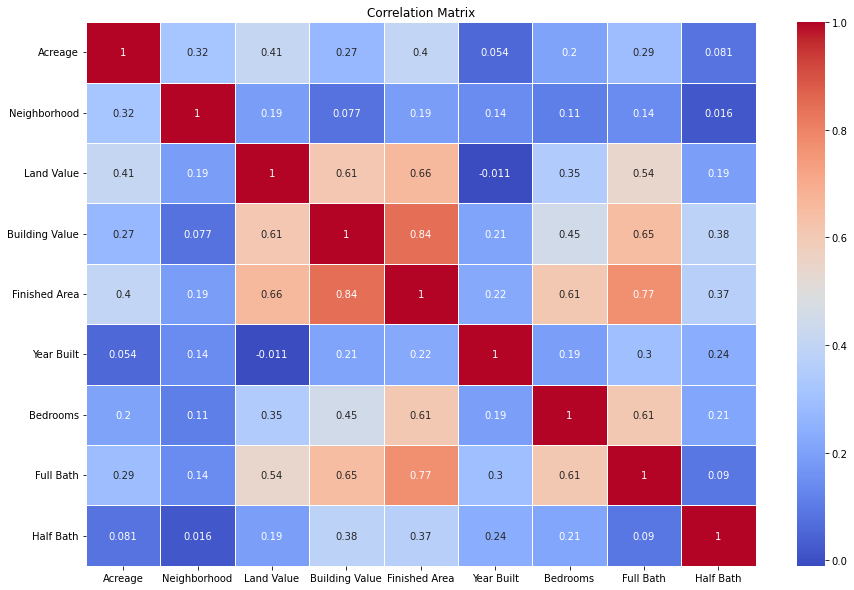

In [16]:
# Correlation plot
plt.figure(figsize=(15, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

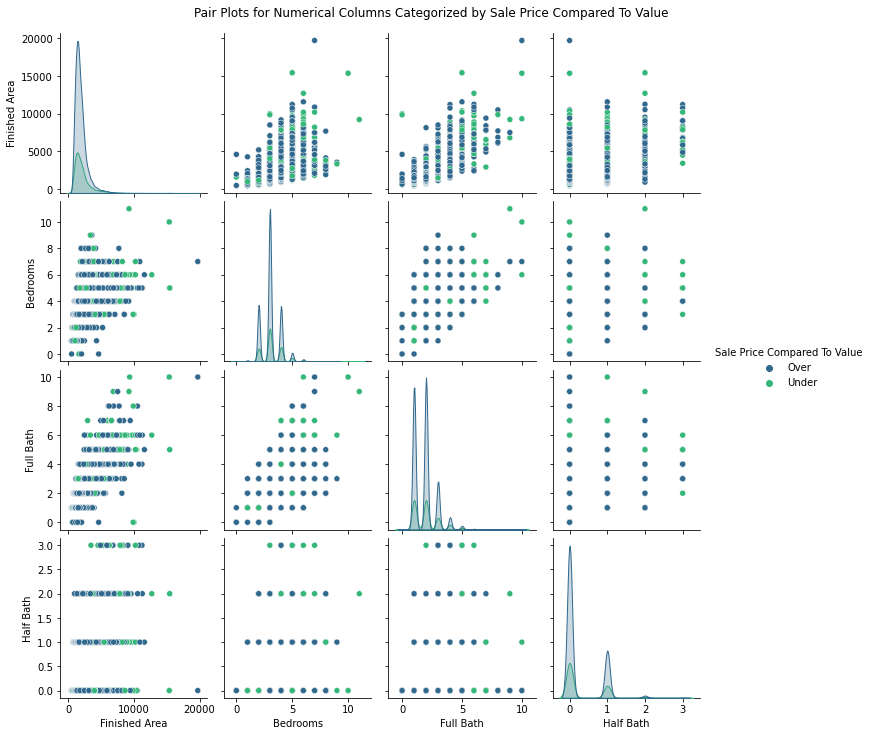

In [33]:
# Pair plots for a subset of numerical columns


# Pair plots for a subset of numerical columns with categorization based on 'Sale Price Compared To Value'
selected_cols = ['Finished Area', 'Bedrooms', 'Full Bath', 'Half Bath']
sns.pairplot(df[selected_cols + ['Sale Price Compared To Value']], hue='Sale Price Compared To Value', kind='scatter', diag_kind='kde', palette='viridis')
plt.suptitle('Pair Plots for Numerical Columns Categorized by Sale Price Compared To Value', y=1.02)
plt.show()

In [12]:
## Logistic Regression Model ##
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Splitting the data into training and testing sets
X = df.drop(['Sale Price Compared To Value'], axis=1)
y = df['Sale Price Compared To Value']
##y_encoded = y.astype('str').factorize()[0]

X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X, y, test_size=0.2, random_state=42)

# Identifying numerical and categorical columns
numerical_cols = X_train_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_train_encoded.select_dtypes(include=['object']).columns.tolist()

# Creating transformers for numerical and categorical columns
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

# Creating a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Creating a pipeline with the preprocessor and the logistic regression model
pipeline_encoded = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('model', LogisticRegression(max_iter=1000))])

# Training the logistic regression model
pipeline_encoded.fit(X_train_encoded, y_train_encoded)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Acreage', 'Neighborhood',
                                                   'Land Value',
                                                   'Building Value',
                                                   'Finished Area',
                                                   'Year Built', 'Bedrooms',
                                                   'Full Bath', 'Half Bath']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Parcel ID', 'Land Use',
                                                   'Property Address',
                                                   'Property City', 'Sale Date',
   

In [16]:
# Predicting on the test set
y_pred_encoded = pipeline_encoded.predict(X_test_encoded)

# Evaluating the logistic regression model
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
classification_rep = classification_report(y_test_encoded, y_pred_encoded)
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)

print (accuracy, classification_rep, conf_matrix)

0.7594350033105275               precision    recall  f1-score   support

        Over       0.77      0.97      0.86      3389
       Under       0.61      0.13      0.21      1142

    accuracy                           0.76      4531
   macro avg       0.69      0.55      0.53      4531
weighted avg       0.73      0.76      0.69      4531
 [[3297   92]
 [ 998  144]]


/Users/bhagyashrikadam/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 2, 4, 5, 13] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [18]:
## Logistic Regression Model using sklearn ##

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Splitting the data
X = pd.get_dummies(df.drop(['Sale Price Compared To Value'], axis=1), drop_first=True)
y = df['Sale Price Compared To Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the logistic regression model
logreg = LogisticRegression(max_iter=1000 , random_state=42)
logreg.fit(X_train, y_train)

# Predicting on the test set
y_pred = logreg.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(accuracy)
print(classification_rep)
print(conf_matrix)


0.7492827190465681
              precision    recall  f1-score   support

        Over       0.75      1.00      0.86      3389
       Under       0.64      0.01      0.02      1142

    accuracy                           0.75      4531
   macro avg       0.69      0.50      0.44      4531
weighted avg       0.72      0.75      0.65      4531

[[3381    8]
 [1128   14]]


In [38]:
## Computing Coefficients for our Model ##

import matplotlib.pyplot as plt
import numpy as np

# Extracting the coefficients
coefficients = logreg.coef_[0]
features = X.columns

# Creating a DataFrame for coefficients
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Sorting the DataFrame by the absolute value of the coefficients
coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)

coef_df


,Feature,Coefficient
5,Year Built,-0.000716
4,Finished Area,0.000022
1,Neighborhood,0.000020
3,Building Value,0.000001
2,Land Value,-0.000001
...,...,...
36154,Property Address_5954 TEMPLE RD,0.000000
36153,Property Address_5951 TEMPLE RD,0.000000
36152,Property Address_5950 POST RD,0.000000
36146,Property Address_5944 ABBOTT DR,0.000000


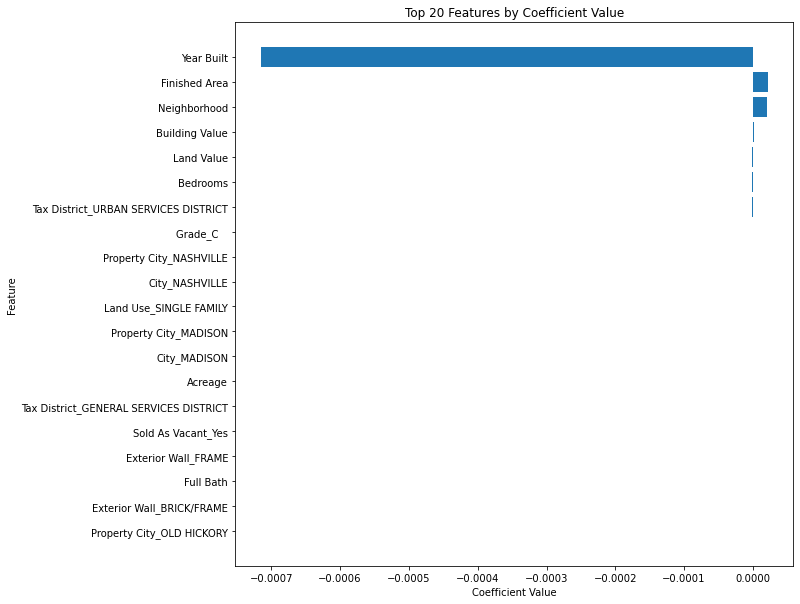

In [39]:
# Plotting the top features
plt.figure(figsize=(10, 10))
plt.barh(coef_df['Feature'][:20], coef_df['Coefficient'][:20])  # Top 20 features
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 20 Features by Coefficient Value')
plt.gca().invert_yaxis()  # To display the top feature at the top
plt.show()

In [19]:
# PART 3 : Decision Tree Model #

from sklearn.tree import DecisionTreeClassifier

# Initializing and training the decision tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluating the decision tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print(accuracy_dt)
print(classification_rep_dt)
print(conf_matrix_dt)


0.7084528801589053
              precision    recall  f1-score   support

        Over       0.77      0.86      0.82      3389
       Under       0.38      0.25      0.31      1142

    accuracy                           0.71      4531
   macro avg       0.58      0.56      0.56      4531
weighted avg       0.68      0.71      0.69      4531

[[2920  469]
 [ 852  290]]


In [34]:
# PART 4 : Random Forest Model #

from sklearn.ensemble import RandomForestClassifier

# Initializing and training the random forest model
##rf_model = RandomForestClassifier(random_state=42)
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42 , class_weight='balanced')

rf_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluating the random forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(accuracy_rf)
print(classification_rep_rf)
print(conf_matrix_rf)


0.6815272566762304
              precision    recall  f1-score   support

        Over       0.80      0.76      0.78      3389
       Under       0.38      0.44      0.41      1142

    accuracy                           0.68      4531
   macro avg       0.59      0.60      0.60      4531
weighted avg       0.70      0.68      0.69      4531

[[2586  803]
 [ 640  502]]


In [22]:
# PART 5 : Gradient Boost Model #

from sklearn.ensemble import GradientBoostingClassifier

# Initializing and training the gradient boost model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluating the gradient boost model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

print(accuracy_gb)
print(classification_rep_gb)
print(conf_matrix_gb)


0.7552416685058486
              precision    recall  f1-score   support

        Over       0.76      0.99      0.86      3389
       Under       0.71      0.05      0.09      1142

    accuracy                           0.76      4531
   macro avg       0.73      0.52      0.48      4531
weighted avg       0.74      0.76      0.67      4531

[[3366   23]
 [1086   56]]


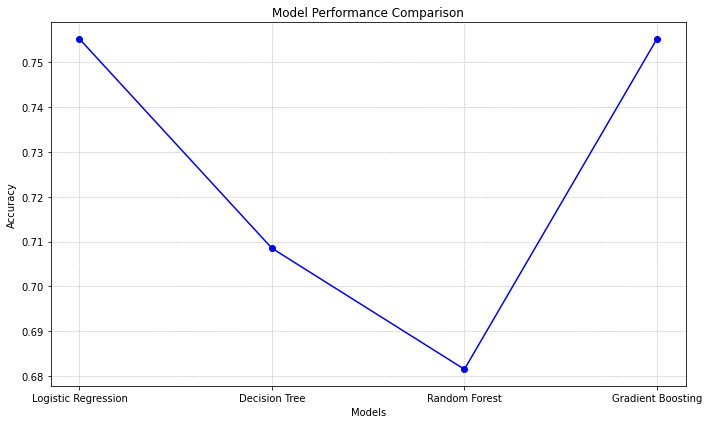

In [35]:
## Comparison ##

import matplotlib.pyplot as plt

# Model names
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

# Accuracy values for each model (based on the provided results)
accuracies = [0.7552, 0.7085, 0.6815, 0.7552]

plt.figure(figsize=(10, 6))
plt.plot(models, accuracies, marker='o', linestyle='-', color='b')
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()
